## PCA + t-SNE

## IMPORTING MAJOR LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid', 'tan', 'forest','olive','goldenrod', 'lightcyan', 'navy']

In [14]:
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

## t-SNE on makecircle

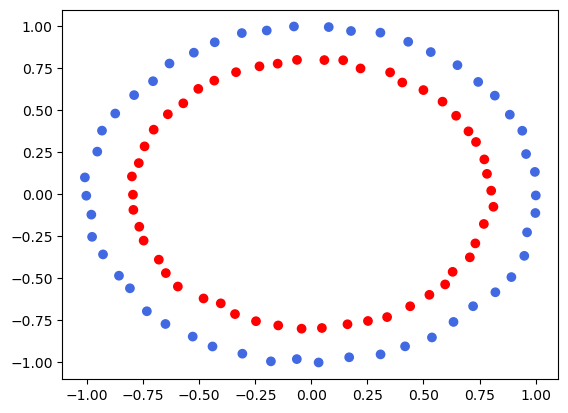

In [17]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples = 100, noise = 0.01)
plt.scatter(x[:, 0], x[:, 1], c=vectorizer(y))
plt.show()

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 42)

In [21]:
x_reduced_tsne = tsne.fit_transform(x)

In [23]:
pd.DataFrame(x_reduced_tsne)

,0,1
0,0.984216,2.755668
1,1.308074,2.212251
2,2.820397,-1.478356
3,-2.553376,-1.128313
4,2.411134,-2.062638
...,...,...
95,3.119492,-0.279719
96,-2.417465,-1.440636
97,-0.136102,2.749809
98,-1.702379,-2.438630


In [25]:
pd.DataFrame(x)

,0,1
0,1.000928,-0.009591
1,0.783187,0.118991
2,-0.231539,0.759341
3,-0.441053,-0.909115
4,-0.433170,0.674299
...,...,...
95,0.141781,0.795706
96,-0.529246,-0.850148
97,0.949582,-0.369431
98,-0.809300,-0.562565


## PERPLEXITY ASPECT WTIH tSNE

In [76]:
tsne = TSNE(n_components = 2,  perplexity = 10, random_state = 42)
x_30 = tsne.fit_transform(x)

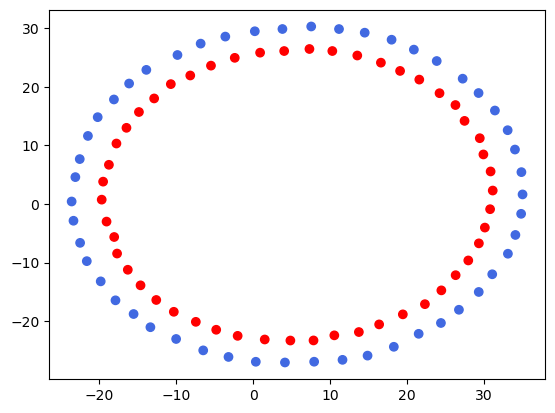

In [78]:
plt.scatter(x_30[:, 0], x_30[:, 1], c = vectorizer(y))
plt.show()

## PCA ON MNIST DATASET

In [81]:
from sklearn.datasets import fetch_openml

In [92]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.uint8)

x = mnist['data']
y = mnist['target']

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [100]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components = 2)

In [104]:
pd.DataFrame(pca.fit_transform(x_train))

,0,1
0,21.380207,-940.286233
1,-779.256963,-144.984675
2,-321.935478,54.369224
3,-524.129494,-8.341980
4,-93.804033,-262.365949
...,...,...
55995,-298.519906,-779.756148
55996,37.367747,228.107586
55997,-72.893634,-465.238950
55998,-763.946023,626.879524


In [106]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
43395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MAKING SWISS ROLL

In [109]:
from sklearn.datasets import make_swiss_roll

In [113]:
x, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

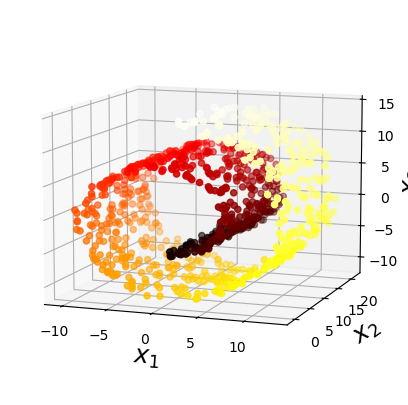

In [117]:
axes = [ -11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c = t, cmap = plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [119]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

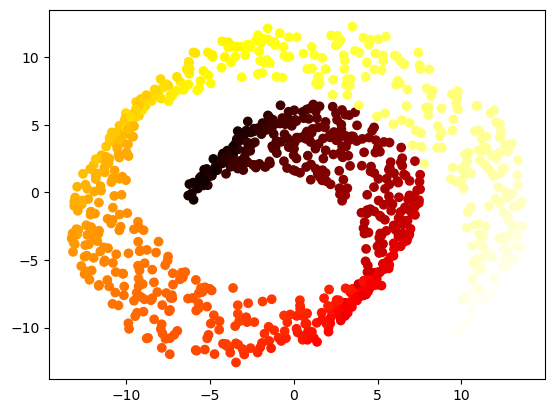

In [121]:
plt.scatter(x_pca[:,0], x_pca[:, 1], c = t, cmap = plt.cm.hot)